# Analyzing GDP and Life Expectancy of 6 countries in 2000 - 2015
This project aims to analyse the relationship between GDP and Life Expectancy in six different countries: Chile, China, German, Mexico, the U.S. and Zimbabwe. The data, which is in "all_data.csv" was provided by the World Health Organization and the World Bank.

In [1]:
# Import necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Set GDP to original form
pd.set_option('display.float_format', '{:.2f}'.format)
# Set maximum rows displayed equal to None
pd.set_option('display.max_rows', None)

## Load Data
"all_data.csv" consists of 4 columns:
- **Country** - the country observed
- **Year** - years ranged from 2000 to 2015
- **Life expectancy at birth (years)** - the lifespan of people estimated at birth
- **GDP** - gross domestic product

In [3]:
# load data from csv file
df = pd.read_csv("all_data.csv")

In [4]:
# print dataframe
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00
5,Chile,2005,78.40,122965000000.00
6,Chile,2006,78.90,154788000000.00
7,Chile,2007,78.90,173606000000.00
8,Chile,2008,79.60,179638000000.00
9,Chile,2009,79.30,172389000000.00


In [5]:
# statistics of each numeric columns
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.00,96.00,96.00
mean,2007.50,72.79,3880498570768.40
std,4.63,10.67,5197561310975.92
min,2000.00,44.30,4415702800.00
25%,2003.75,74.47,173301750000.00
50%,2007.50,76.75,1280220000000.00
75%,2011.25,78.90,4067510000000.00
max,2015.00,81.00,18100000000000.00


## Analysis

From the table above, we can see that the average life expectancy was 72.79 years old which is considerably high. But there may some outliers since the minimum average life expectancy is 44.30 years. 

In [6]:
# check the unique countries in the dataset
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

## Wrangling Data


In [7]:
# shorten long column names
df.rename({"Life expectancy at birth (years)": "LE"}, axis=1, inplace=True)

# add the column GDP_b by dividing GDP with 1 billion
df['GDP_b'] = df['GDP']/1000000000

# check to see if the column's name has changed
df.head()

,Country,Year,LE,GDP,GDP_b
0,Chile,2000,77.30,77860932152.00,77.86
1,Chile,2001,77.30,70979923960.00,70.98
2,Chile,2002,77.80,69736811435.00,69.74
3,Chile,2003,77.90,75643459840.00,75.64
4,Chile,2004,78.00,99210392858.00,99.21


## Questions
- What is the average GDP and life expectancy of each country?
- How had the GDP and life expectancy of each country changed over time?
- Was there any correlation between GDP and life expectancy?

In [8]:
# create a table to show the average GDP and life expectancy of each country
avg_gdp_le = df.groupby('Country').mean()
avg_gdp_le = avg_gdp_le.drop(['Year', 'GDP'], axis=1)
avg_gdp_le = avg_gdp_le.sort_values('LE', ascending=False).reset_index()
avg_gdp_le

,Country,LE,GDP_b
0,Germany,79.66,3094.78
1,Chile,78.94,169.79
2,United States of America,78.06,14075.00
3,Mexico,75.72,976.65
4,China,74.26,4957.71
5,Zimbabwe,50.09,9.06


## Analysis

The above table shows that most countries had an average life expectancy between 74 to 79. Zimbabwe had the lowest average lifespan at around 50 and a low GDP of about $9B.

# Data Visualization
To compare the difference in the GDP and life expectancy of six countries, I have developed 3 types of diagrams:
- 2 bar charts showing that average life expectancy of each countries and average GDP (billion USD) of each countries 
- 2 line graphs showing GDP during 2000-2015 and life expectancy at birth during 2000-2015 
- A scatterplot of GDP & life expectancy between 2000-2015

## Average Life Expectancy by Country

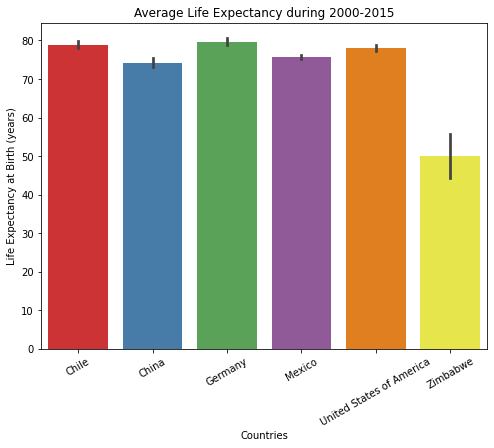

In [17]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax = sns.barplot(data =df, x='Country', y='LE', ci='sd', palette='Set1', estimator=np.mean)
ax.set_xticklabels(labels=df.Country.unique().tolist(), rotation=30)
ax.set_ylabel("Life Expectancy at Birth (years)")
ax.set_xlabel("Countries")
ax.set_title("Average Life Expectancy during 2000-2015")
plt.show()

## Analysis

Except of Zimbabwe, the life expectancy in most countries is quite high. Germany's population had the longest years of life expectancy at around 80%, while Zimbabwe's had the shortest longevity at around 50 years old.

## Average GDP (billion USD) by Country

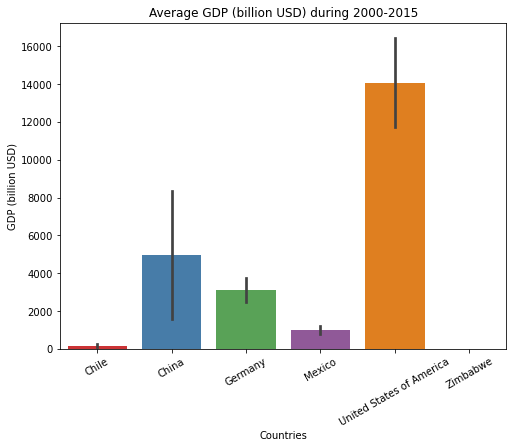

In [18]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax = sns.barplot(data =df, x='Country', y='GDP_b', ci='sd', palette='Set1', estimator=np.mean)
ax.set_xticklabels(labels=df.Country.unique().tolist(), rotation=30)
ax.set_ylabel("GDP (billion USD)")
ax.set_xlabel("Countries")
ax.set_title("Average GDP (billion USD) during 2000-2015")
plt.show()

## Changes in GDPs During 2000-2015

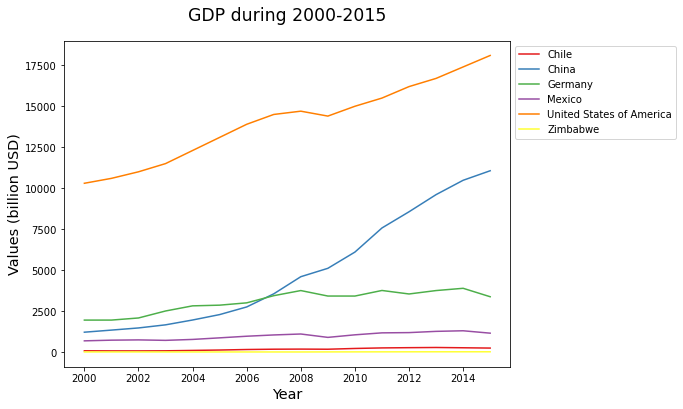

In [19]:
# create countries list
countries = df.Country.unique().tolist()

#create labels and x ticks for x-axis
years = [str(2000+x) for x in range(0, 16)]

    
# create a figure
fig, ax = plt.subplots(figsize=(8,6))

# plot graph
ax = sns.lineplot(data = df, x='Year', y='GDP_b', hue='Country', palette='Set1')

ax.legend(bbox_to_anchor=[1, 1], loc='upper left')
ax.set_ylabel("Values (billion USD)", fontsize= 'x-large')
ax.set_xlabel("Year", fontsize="x-large")
ax.set_title("GDP during 2000-2015", fontsize='xx-large', pad=20)
plt.show()

## Analysis

All 6 countries had seen an increase in GDP throughout the period. GDP growth in the US specifically far exceeded other countries, with China behind increasing rapidly beginning 2008. Remaining countries only saw a slight increase in GDP.

## Changes in Life Expectancy During 2000-2015

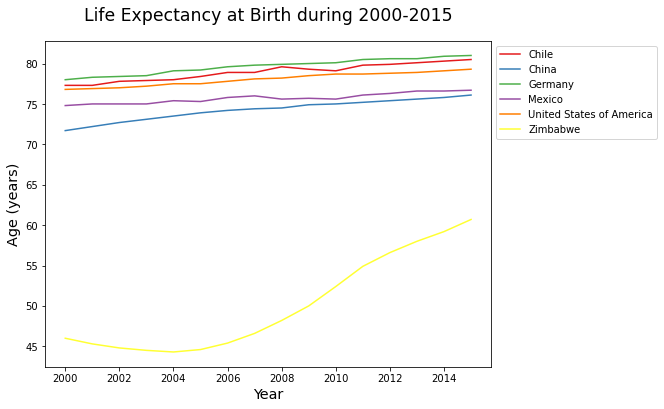

In [20]:
# create countries list
countries = df.Country.unique().tolist()

#create labels and x ticks for x-axis
years = [str(2000+x) for x in range(0, 16)]

    
# create a figure
fig, ax = plt.subplots(figsize=(8,6))

# plot graph
ax = sns.lineplot(data = df, x='Year', y='LE', hue='Country', palette='Set1')

ax.set_title("Life Expectancy at Birth during 2000-2015", fontsize='xx-large', pad=20)
ax.legend(bbox_to_anchor=[1, 1], loc='upper left')
ax.set_ylabel("Age (years)", fontsize= 'x-large')
ax.set_xlabel("Year", fontsize='x-large')
plt.show()

## Analysis

Looking at the line graphs above, we can see that except Zimbabwe, most countries share similar trends in life expectancy (from 72-80 years old), despite differences in GDP growth. 

One note, however: China's GDP had been increasing rapidly (even surpassing other countries beginning 2008), but it has a lower life expectancy compared to other countries except Zimbabwe.

## Correlation between  GDP and Life Expectancy

<Figure size 432x288 with 0 Axes>

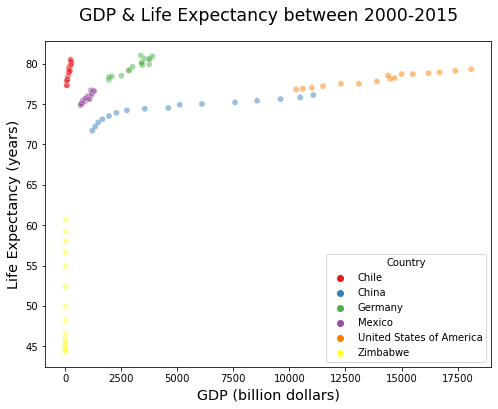

In [21]:
plt.clf()
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2 = sns.scatterplot(data=df, x='GDP_b', y='LE', hue='Country', palette='Set1', alpha=0.5)
ax2.set_xlabel("GDP (billion dollars)", fontsize='x-large')
ax2.set_ylabel("Life Expectancy (years)", fontsize='x-large')
ax2.set_title("GDP & Life Expectancy between 2000-2015", fontsize='xx-large', pad=20)
plt.show()


# Analysis

There seems to be a linear relationship between GDP and life expectancy. The higher the GDP, the higher the life expectancy. 

It is worth noting however that each country differs in its rate of life expectancy growth. Furthermore, China seems to be an outlier as while it has a high rate of GDP growth, its life expectancy is lower compared to that of other countries.

## Scatterplots to show the relationship between GDP and Life Expectancy in each country

<Figure size 432x288 with 0 Axes>

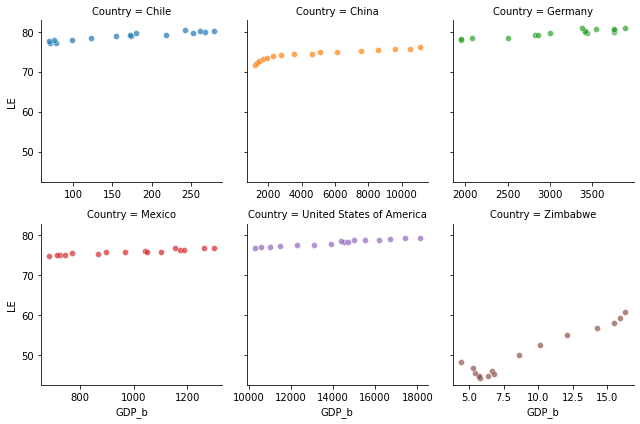

In [14]:
plt.clf()
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=3, sharex=False, hue='Country')
g.map(sns.scatterplot, 'GDP_b', 'LE', data=df, alpha=0.7)


## Analysis

From these scatterplots, we can see that Chile, China, Germany, Mexico, and USA share very similar life expectancy growth.

## Conclusion
- Between 2000 - 2015, the average life expectancy of each countries were between 74 - 79 years old. An outlier is the average life expectancy in Zimbabwe: around 50 years old. Germany had the longest life expectancy and Zimbabwe had the shortest life expectancy.
- Regarding GDP, the U.S. far surpassed other countries in the dataset. The Chinese GDP however began to increase rapidly in 2005 to about 10,000 billion USD in 2015. The GDP in Germany, Mexico, Chile and Zimbabwe only grew very slightly throughout this period.
- There was a linear relationship between GDP and life expectancy. The higher the GDP, the higher the longevity. Most countries had a high life expectancy which grew slightly when the GDP grew. Zimbabwe has the highest life expectancy growth.